# Import Modules

In [1]:
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from clean_telecom_dataframe import Telecom
from plot_telecom_dataframe import TelecomPlotter

# Read CSV Data

In [3]:
telecom_clean_df = pd.read_csv("../data/telecom_cleaned_data.csv")

In [4]:
#initialize the  imported cleaner and plotter
telecom_plot = TelecomPlotter()
telecom_cleaner = Telecom()

In [5]:
telecom_clean_df.shape

(138071, 55)

In [6]:
telecom_clean_df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,-9223372036854775808,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,-9223372036854775808,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,208201909211140,33681854413,35794009006359,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,-9223372036854775808,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,208200314458056,33760627129,35281510359387,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,4,-9223372036854775808,2019-04-12 20:10:00,565,2019-04-25 10:40:00,954,208201401415120,33699795932,35407009745539,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
4,6,-9223372036854775808,2019-04-13 08:41:00,612,2019-04-25 08:16:00,168,208201448341047,33665368271,86762704322800,9.16456701058919E+015,...,47925246.0,70562047.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0,118487293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138066,149994,-9223372036854775808,2019-04-29 07:28:00,83,2019-04-30 15:01:00,268,208200313074099,33645655643,35155409288696,T88383B,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0
138067,149996,7277825670196679680,2019-04-29 07:28:00,451,2019-04-30 06:02:00,214,208202201200072,33650688697,35483109451938,D20434A,...,57628851.0,574175259.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,631804110.0
138068,149997,7349883264234609664,2019-04-29 07:28:00,483,2019-04-30 10:41:00,187,208201908153249,33663449963,35660508296467,D10223C,...,39135081.0,666648844.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,705783925.0
138069,149998,-9223372036854775808,2019-04-29 07:28:00,283,2019-04-30 10:46:00,810,208201711161187,33621890103,35721209870907,T51102A,...,34912224.0,592786405.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,627698629.0


# Univariate Analysis

In [7]:
# combine upload and download datafor each app and total data to make it easy to make analysis easier
telecom_clean_df['Social Media Data Volume (Bytes)'] = telecom_clean_df['Social Media UL (Bytes)'] + telecom_clean_df['Social Media DL (Bytes)']
telecom_clean_df['Google Data Volume (Bytes)'] = telecom_clean_df['Google UL (Bytes)'] + telecom_clean_df['Google DL (Bytes)']
telecom_clean_df['Email Data Volume (Bytes)'] = telecom_clean_df['Email UL (Bytes)'] + telecom_clean_df['Email DL (Bytes)']
telecom_clean_df['Youtube Data Volume (Bytes)'] = telecom_clean_df['Youtube UL (Bytes)'] + telecom_clean_df['Youtube DL (Bytes)']
telecom_clean_df['Netflix Data Volume (Bytes)'] = telecom_clean_df['Netflix UL (Bytes)'] + telecom_clean_df['Netflix DL (Bytes)']
telecom_clean_df['Gaming Data Volume (Bytes)'] = telecom_clean_df['Gaming UL (Bytes)'] + telecom_clean_df['Gaming DL (Bytes)']
telecom_clean_df['Other Data Volume (Bytes)'] = telecom_clean_df['Other UL (Bytes)'] + telecom_clean_df['Other DL (Bytes)']
telecom_clean_df['Total Data Volume (Bytes)'] = telecom_clean_df['Total UL (Bytes)'] + telecom_clean_df['Total DL (Bytes)']

In [8]:
telecom_clean_df[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.380710e+05
mean,1.827957e+06
std,1.035470e+06
min,1.563000e+03
25%,9.312060e+05
50%,1.826757e+06
75%,2.726343e+06
max,3.650240e+06


In [9]:
telecom_clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138071 entries, 0 to 138070
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        138071 non-null  int64  
 1   Bearer Id                         138071 non-null  int64  
 2   Start                             138071 non-null  object 
 3   Start ms                          138071 non-null  int64  
 4   End                               138071 non-null  object 
 5   End ms                            138071 non-null  int64  
 6   IMSI                              138071 non-null  int64  
 7   MSISDN/Number                     138071 non-null  int64  
 8   IMEI                              138071 non-null  int64  
 9   Last Location Name                138071 non-null  object 
 10  Avg RTT DL (ms)                   138071 non-null  float64
 11  Avg RTT UL (ms)                   138071 non-null  f

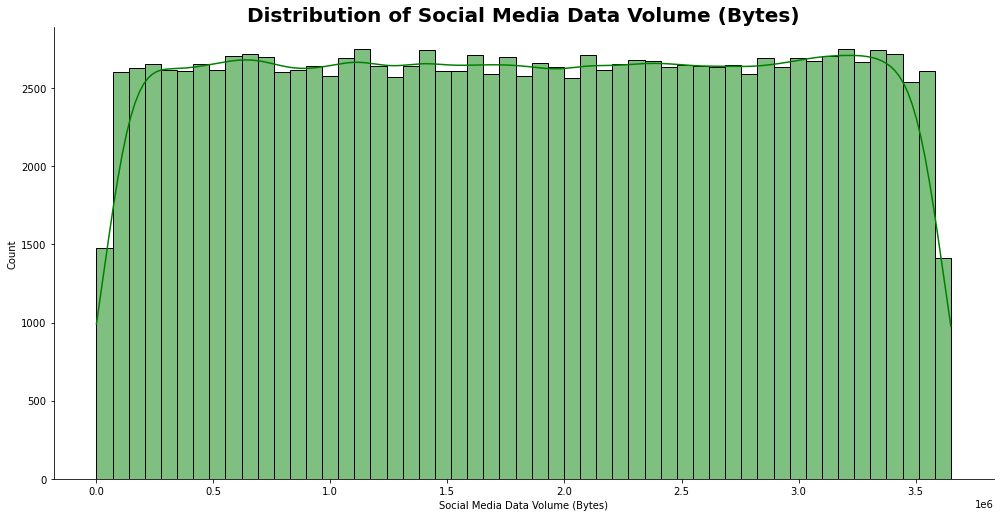

In [10]:
telecom_plot.plot_hist(telecom_clean_df, 'Social Media Data Volume (Bytes)', 'green')

In [11]:
telecom_clean_df[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.380710e+05
mean,7.807930e+06
std,3.517752e+06
min,4.033000e+04
25%,4.940168e+06
50%,7.816637e+06
75%,1.068531e+07
max,1.552878e+07


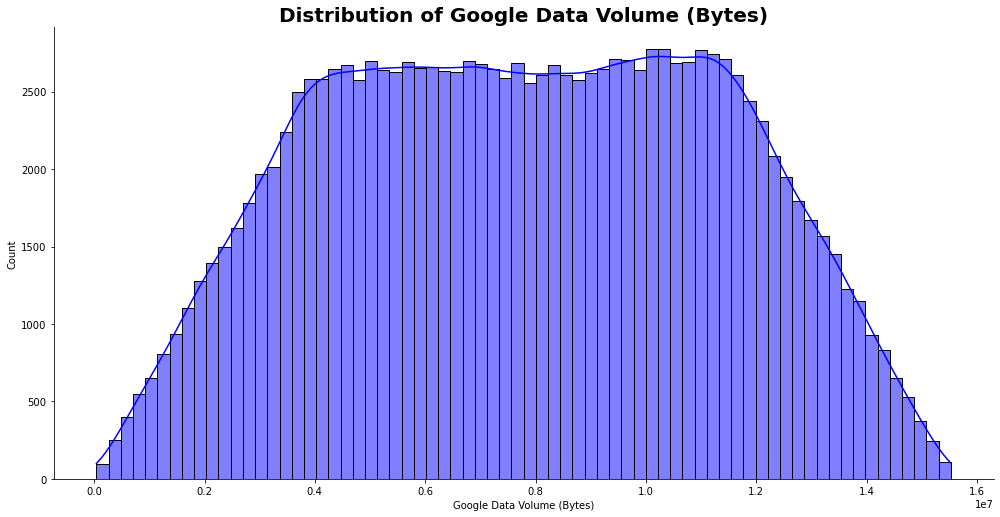

In [12]:
telecom_plot.plot_hist(telecom_clean_df, 'Google Data Volume (Bytes)', 'blue')

In [13]:
telecom_clean_df[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.380710e+05
mean,2.258390e+06
std,1.070802e+06
min,8.359000e+03
25%,1.358567e+06
50%,2.262860e+06
75%,3.158602e+06
max,4.518036e+06


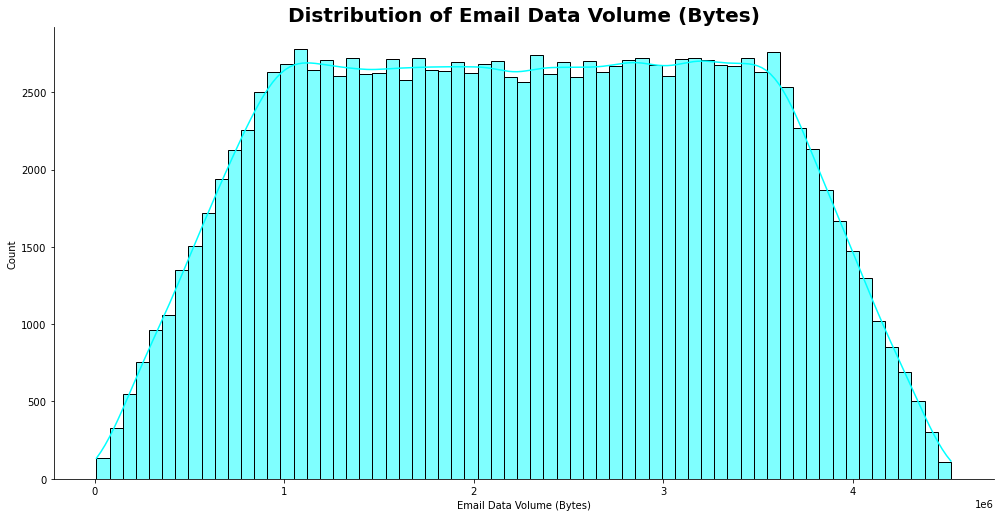

In [14]:
telecom_plot.plot_hist(telecom_clean_df, 'Email Data Volume (Bytes)', 'cyan')

In [15]:
telecom_clean_df[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.380710e+05
mean,2.264140e+07
std,9.247286e+06
min,1.296550e+05
25%,1.599099e+07
50%,2.266795e+07
75%,2.929900e+07
max,4.519008e+07


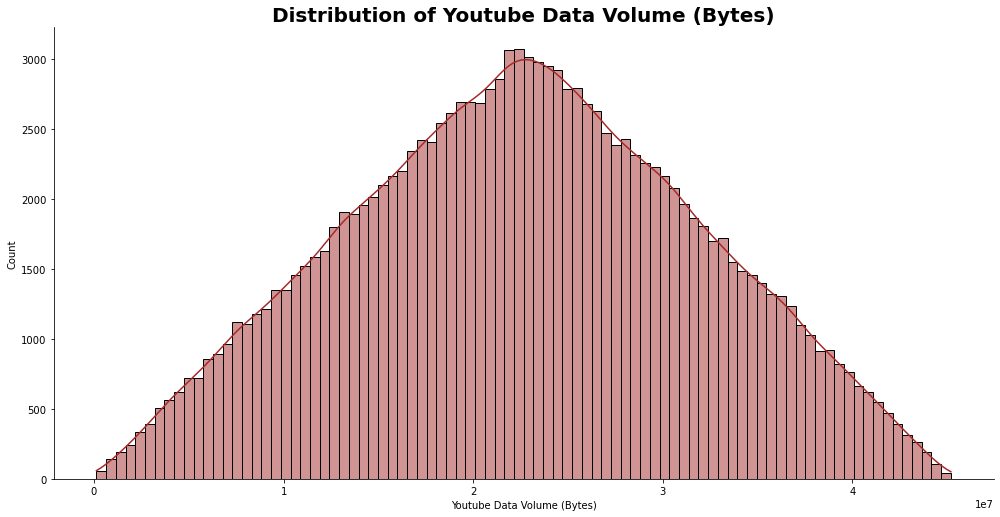

In [16]:
telecom_plot.plot_hist(telecom_clean_df, 'Youtube Data Volume (Bytes)', 'brown')

In [17]:
telecom_clean_df[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.380710e+05
mean,2.262875e+07
std,9.252857e+06
min,9.843200e+04
25%,1.598462e+07
50%,2.263554e+07
75%,2.927244e+07
max,4.519815e+07


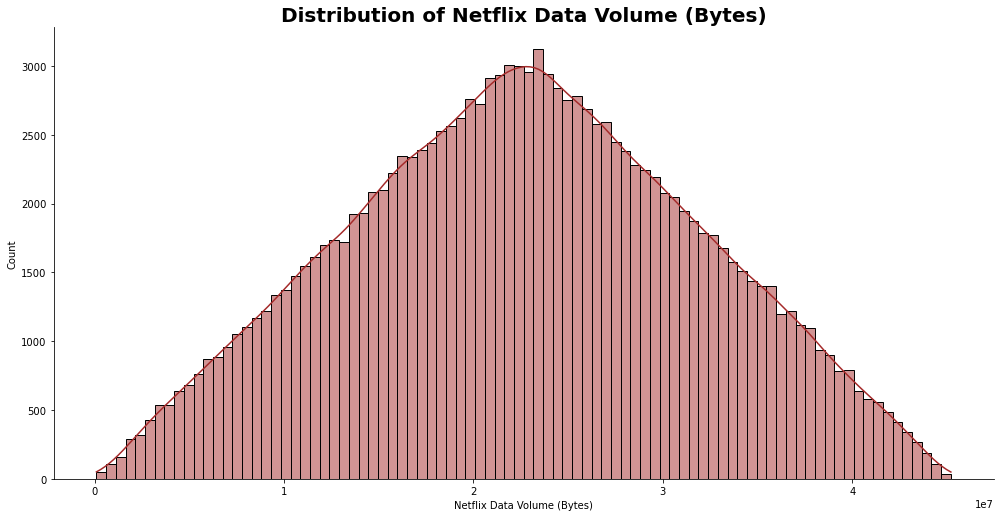

In [18]:
telecom_plot.plot_hist(telecom_clean_df, 'Netflix Data Volume (Bytes)', 'brown')

In [19]:
telecom_clean_df[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.380710e+05
mean,4.300400e+08
std,2.441311e+08
min,3.063580e+05
25%,2.183016e+08
50%,4.311000e+08
75%,6.413710e+08
max,8.592028e+08


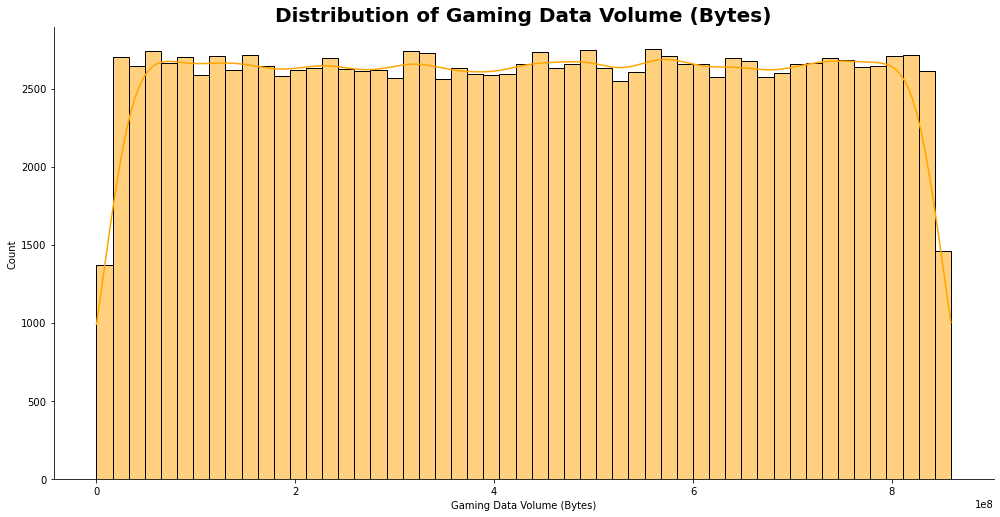

In [20]:
telecom_plot.plot_hist(telecom_clean_df, 'Gaming Data Volume (Bytes)', 'orange')

In [21]:
telecom_clean_df[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.380710e+05
mean,4.954683e+08
std,2.444744e+08
min,2.895611e+07
25%,2.841008e+08
50%,4.962974e+08
75%,7.063820e+08
max,9.559848e+08


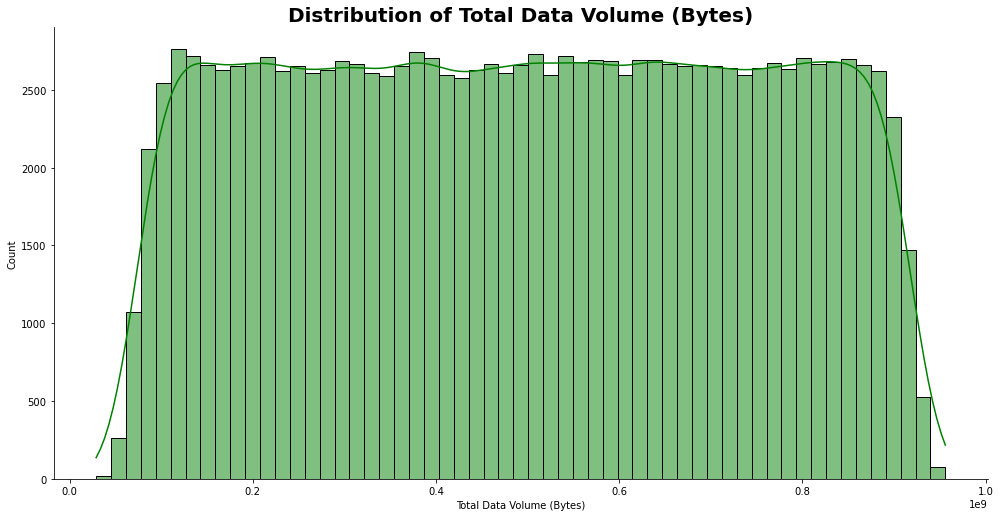

In [22]:
telecom_plot.plot_hist(telecom_clean_df, 'Total Data Volume (Bytes)', 'green')